In [1]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv('AAPL_quarterly_financials.csv')

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc['BasicEPS',:]).iloc[2:,:]

In [5]:
y = y.fillna(0).sort_index()

In [6]:
y.index = pd.to_datetime(y.index)

# 3.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [7]:
from pytrends.request import TrendReq
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and timeframe
keywords = ['cellphone', 'IOS','Tim Cook','Apple Share Price','Titanium','Chip Cost','Hamilton','terrorist','The Weekend']
          #Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [8]:
X = df.resample('Q').mean()

In [9]:
# fix data
temp = pd.concat([y,X],axis =1).dropna()
y = temp[['BasicEPS']].copy()
X = temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda that reduces less than half of your variables. Plot a bar chart.

In [13]:
lasso = Lasso(alpha = .1)

In [14]:
lasso.fit(X_scaled,y)

Lasso(alpha=0.1)

In [15]:
coefficients = lasso.coef_

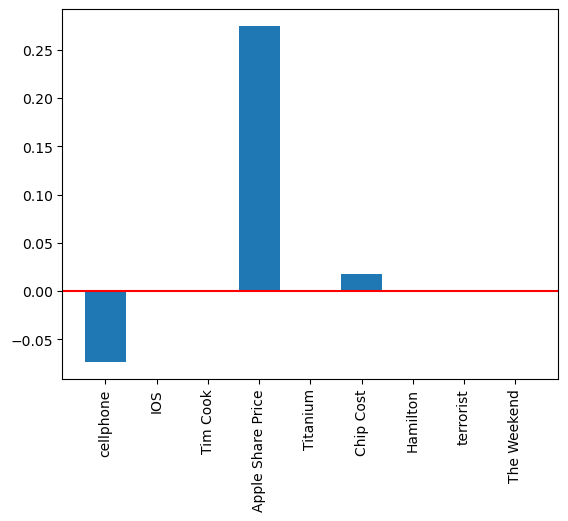

In [16]:
plt.bar(range(len(coefficients)),coefficients)
plt.axhline(0., color = 'red')

plt.xticks(range(len(coefficients)), X.columns, rotation = 'vertical')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

Yes. The lasso regression analysis indicates that variables such as 'IOS', 'Tim Cook', 'Titanium', 'Hamilton', 'terrorist', and 'The Weekend' have been effectively reduced to zero coefficients, suggesting a lack of significance in nowcasting Apple's earnings. On the other hand, key features like 'cellphone', 'Apple Share Price', and 'Chip Cost' retain non-zero coefficients, emphasizing their importance in the regression results. Notably, 'Apple Share Price' exhibits the largest coefficient magnitude, signifying its pivotal role as the most influential feature in the nowcasting model for Apple's earnings.

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?